In [1]:
# import necessary libraries
# for mathematical computation
import numpy as np

# for data structure
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

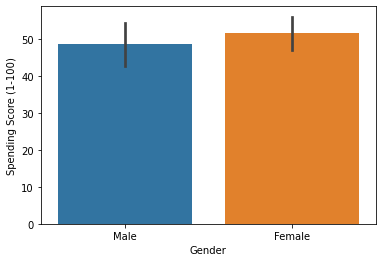

In [5]:
sns.barplot(x='Gender', y='Spending Score (1-100)', data=data)

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

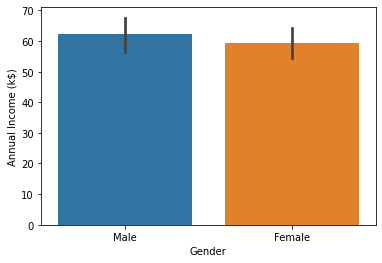

In [6]:
sns.barplot(x='Gender', y='Annual Income (k$)', data=data)

<AxesSubplot:xlabel='Age', ylabel='Count'>

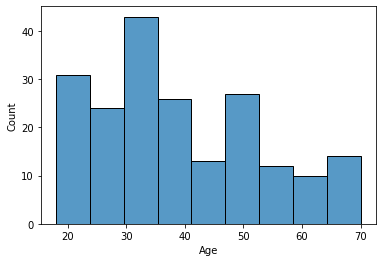

In [7]:
sns.histplot(x='Age', data=data)

In [8]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

<AxesSubplot:>

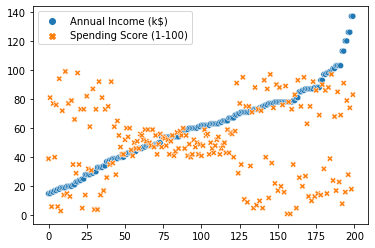

In [9]:
sns.scatterplot(data=X)

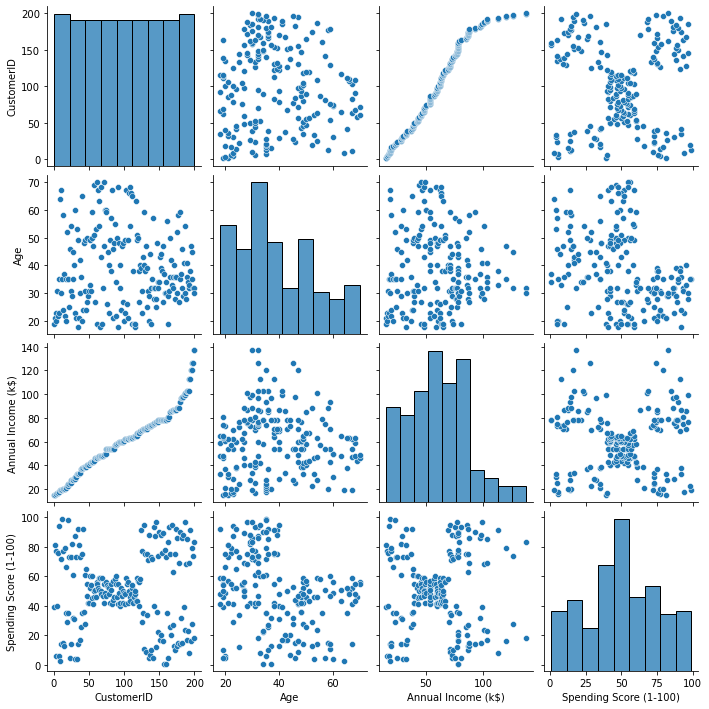

In [10]:
sns.pairplot(data)

<AxesSubplot:>

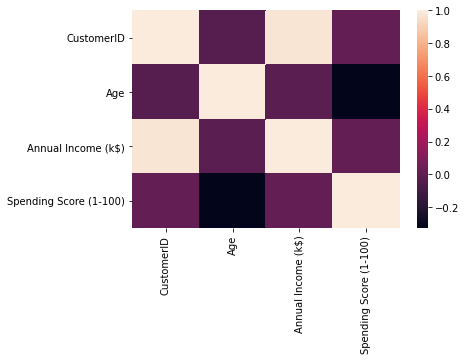

In [11]:
sns.heatmap(data.corr())

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
k_model = KMeans()

In [14]:
k_model.fit(X)

KMeans()

In [15]:
score = silhouette_score(X, k_model.labels_, metric='euclidean')
print(score)

0.4539560903726814


In [16]:
k_model

KMeans()

In [17]:
WSS = []
K = range(1,11)
for k in K:
    k_Model = KMeans(n_clusters=k)
    k_Model.fit(X)
    WSS.append(k_Model.inertia_)

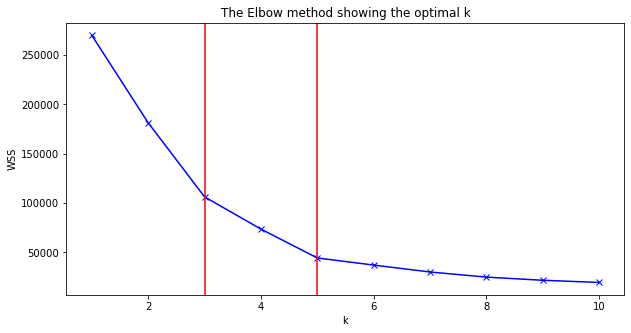

In [18]:
plt.figure(figsize=(10,5))
plt.plot(K, WSS, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('The Elbow method showing the optimal k')
plt.axvline(x=3, color='red')
plt.axvline(x=5, color='red')
plt.show()

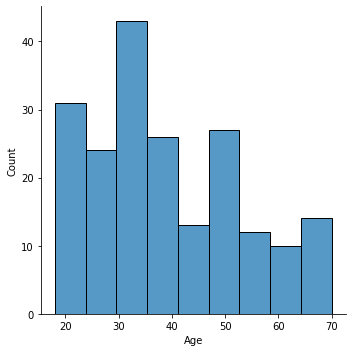

In [19]:
sns.displot(x='Age', data=data)

In [20]:
km = KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=42)
y_means = km.fit_predict(X)

In [21]:
y_means

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

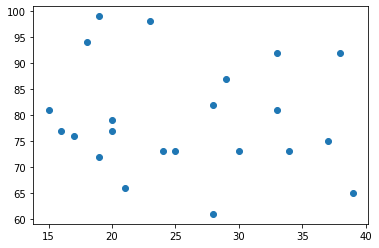

In [22]:
plt.scatter(X[y_means==0].iloc[:, 0], X[y_means==0].iloc[:, 1])

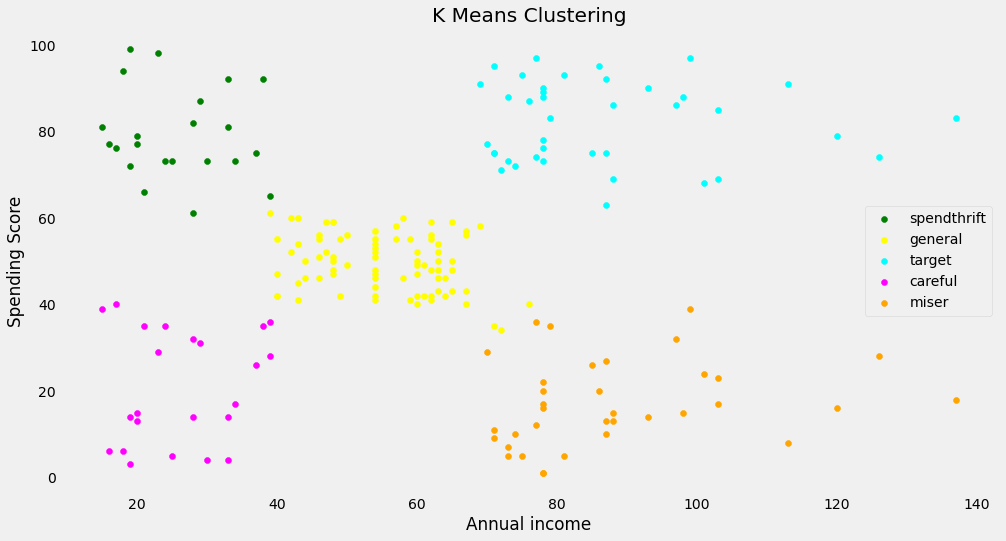

In [23]:
plt.rcParams['figure.figsize'] = (15,8)
plt.style.use('fivethirtyeight')

plt.scatter(X[y_means==0].iloc[:, 0], X[y_means==0].iloc[:, 1], c='green', label='spendthrift')
plt.scatter(X[y_means==1].iloc[:, 0], X[y_means==1].iloc[:, 1], c='yellow', label='general')
plt.scatter(X[y_means==2].iloc[:, 0], X[y_means==2].iloc[:, 1], c='cyan', label='target')
plt.scatter(X[y_means==3].iloc[:, 0], X[y_means==3].iloc[:, 1], c='magenta', label='careful')
plt.scatter(X[y_means==4].iloc[:, 0], X[y_means==4].iloc[:, 1], c='orange', label='miser')

plt.title('K Means Clustering')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

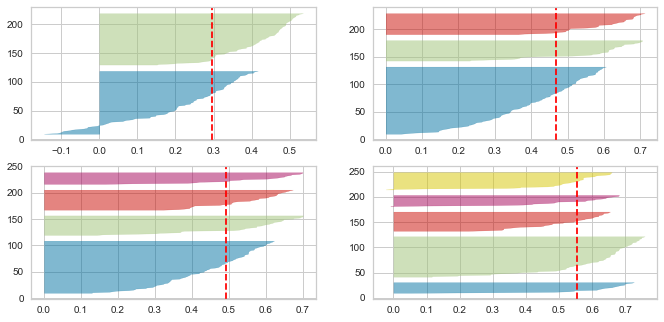

In [24]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2,2, figsize=(10,5))
for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i, 2)
    
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [25]:
divmod(5, 2)

(2, 1)

## Hierarchical Clustering

### Dendrograms

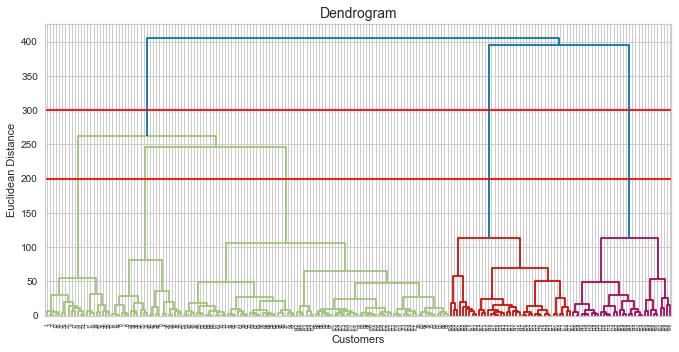

In [26]:
import scipy.cluster.hierarchy as sch

plt.rcParams['figure.figsize'] = (10, 5)
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.axhline(y=300, color='red')
plt.axhline(y=200, color='red')
plt.title('Dendrogram', fontsize=14)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering
Agg_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_ag = Agg_model.fit_predict(X)

In [28]:
y_ag

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

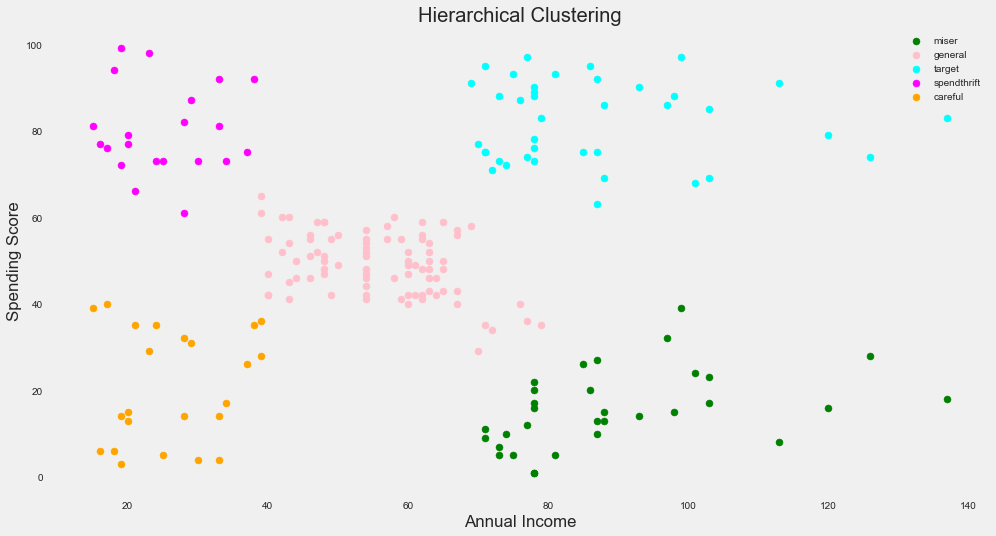

In [29]:
plt.rcParams['figure.figsize']=(15, 8)
plt.style.use('fivethirtyeight')

plt.scatter(X[y_ag==0].iloc[:, 0], X[y_ag==0].iloc[:, 1], color='green', label='miser')
plt.scatter(X[y_ag==1].iloc[:, 0], X[y_ag==1].iloc[:, 1], color='pink', label='general')
plt.scatter(X[y_ag==2].iloc[:, 0], X[y_ag==2].iloc[:, 1], color='cyan', label='target')
plt.scatter(X[y_ag==3].iloc[:, 0], X[y_ag==3].iloc[:, 1], color='magenta', label='spendthrift')
plt.scatter(X[y_ag==4].iloc[:, 0], X[y_ag==4].iloc[:, 1], color='orange', label='careful')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()